Free diffusion of a Brownian particle

Consider a particle initially located at $x = x_0$. Take, for simplicity, $\sigma = 1$ and $\Delta t = 1 s$. Generate $N = 10^4$ independent trajectories $x^{(n)}_j$ ($n$ indicates the realization number and $j$ the time step, $t_j = j \Delta t$). For all simulation runs, $x_0^{(n)} = x_0$. At each time step, the particle can move to the left or to the right with equal probability, so that $$x^{(n)}_{j+1} =x^{(n)}_j \pm \sigma \sqrt{\Delta t}$$  $$x^{(n)}_{j+1} =x^{(n)}_j \pm 1.$$
For various values of $j$, plot a histogram of $x^{(n)}_j$. Show that these are Gaussian j distributions centered at $x_0$ and with a standard deviation of $\sigma \sqrt{2j\Delta t}$. Compare your results with figure 7.2.

In [37]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import trange

# Sigma and delta t are both equal to one. Thus the formula above is substituted by the np.random.choice which chooses uniformely distributed between -1 and 1. Thus representing the action described in the problem. 
# Also keep in mind that this code is  vectorized. See actionMatrix is precalculated.

t0 = 5  # is j in the textbook formula t_j = j Delta t
t = 64*t0+1
N = 10000
dt = np.sqrt(1)
x = np.zeros((1, N))  # Preallocation of the positions
counter = 0
results = np.zeros((4,N))

for i in trange(t):
    x = x + np.random.choice([-dt, dt], size=(1,N))

    if i in [t0,t0*4,t0*16,t0*64]:
        results[counter, :] = x
        counter += 1                

print(results)

100%|██████████| 321/321 [00:00<00:00, 14880.98it/s]

[[ -2.   6.   0. ...   2.   0.   2.]
 [  3.  -5.   1. ...   1.  -1.  -5.]
 [  3.  -3. -15. ...   1. -15. -23.]
 [ 31. -41.   1. ...  13.   3. -15.]]


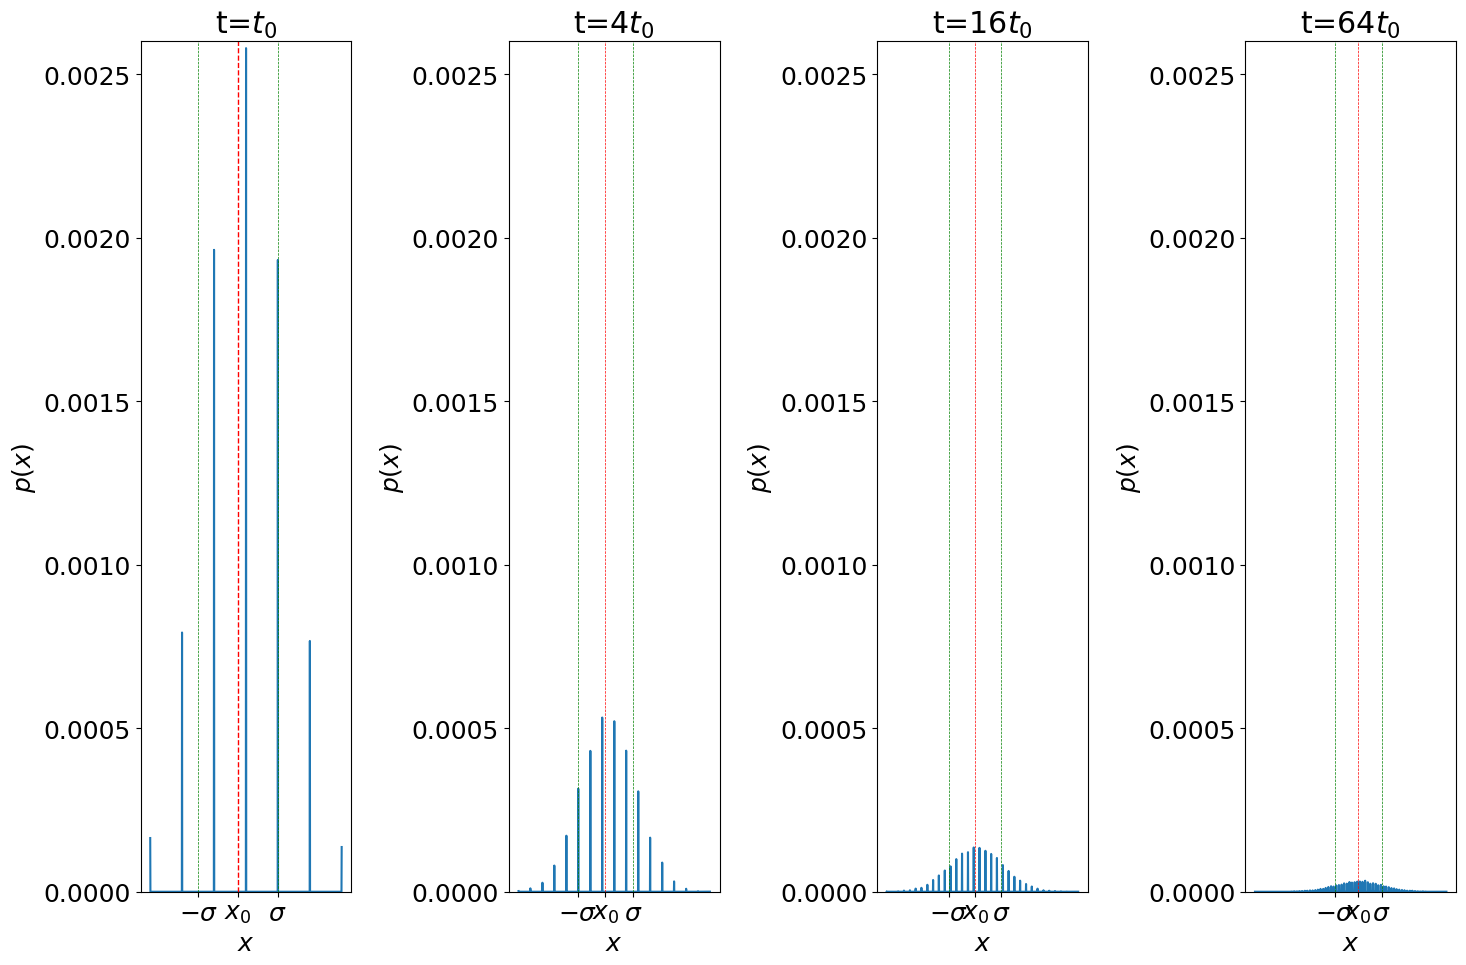

Mean(t_0) = -0.0396
Mean(4t_0) = 0.0046
Mean(16t_0) = 0.077
Mean(64t_0) = 0.0462
Std(t_0) = 2.4821023024847304
Std(4t_0) = 4.587197275025351
Std(16t_0) = 9.003181160012275
Std(64t_0) = 17.902141368003996
Theoretical Std(t_0) = 3.1622776601683795
Theoretical Std(4t_0) = 6.324555320336759
Theoretical Std(16t_0) = 12.649110640673518
Theoretical Std(64t_0) = 25.298221281347036
Ratio of theoretical to numerical 0.784909666139996
Ratio of theoretical to numerical 0.7252995732798966
Ratio of theoretical to numerical 0.7117639663188913
Ratio of theoretical to numerical 0.7076442714651903


In [38]:
l10 = np.arange(40) - 20
l100 = np.arange(80) - 40
l1000 = np.arange(180) - 90
l10000 = np.arange(260) - 130
h10 = np.histogram(results[0, :], 1000, density=True)
h100 = np.histogram(results[1, :], 1000, density=True)
h1000 = np.histogram(results[2, :], 1000, density=True)
h10000 = np.histogram(results[3, :], 1000, density=True)

mean10 = np.mean(results[0, :])
mean100 = np.mean(results[1, :])
mean1000 = np.mean(results[2, :])
mean10000 = np.mean(results[3, :])

std10 = np.std(results[0, :])
std100 = np.std(results[1, :])
std1000 = np.std(results[2, :])
std10000 = np.std(results[3, :])

# Create a figure with 1 row and 4 columns for subplots
plt.figure(figsize=(15, 10))

# Plot for t=10
plt.subplot(1, 4, 1)
plt.plot(h10[1][:-1] + 1/2, h10[0]/N)
plt.axvline(0, color='r', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(0 + std10, color='g', linestyle='dashed', linewidth=0.5, label='Mean + 1$\sigma$')
plt.axvline(0 - std10, color='g', linestyle='dashed', linewidth=0.5, label='Mean - 1$\sigma$')
plt.ylabel('$p(x)$')
plt.xlabel('$x$')
plt.title('t=$t_0$')
plt.ylim(0,0.0026)
plt.xticks([-std10, 0, std10], ['$-\sigma$', '$x_0$', '$\sigma$'])

# Plot for t=100
plt.subplot(1, 4, 2)
plt.plot(h100[1][:-1] + 1/2, h100[0]/N)
plt.axvline(0, color='r', linestyle='dashed', linewidth=0.5, label='Mean')
plt.axvline(0 + std100, color='g', linestyle='dashed', linewidth=0.5, label='Mean + 1$\sigma$')
plt.axvline(0 - std100, color='g', linestyle='dashed', linewidth=0.5, label='Mean - 1$\sigma$')
plt.ylabel('$p(x)$')
plt.xlabel('$x$')
plt.title('t=$4t_0$')
plt.ylim(0,0.0026)
plt.xticks([-std100, 0, std100], ['$-\sigma$', '$x_0$', '$\sigma$'])


# Plot for t=1000
plt.subplot(1, 4, 3)
plt.plot(h1000[1][:-1] + 1/2, h1000[0]/N)
plt.axvline(0, color='r', linestyle='dashed', linewidth=0.5, label='Mean')
plt.axvline(0 + std1000, color='g', linestyle='dashed', linewidth=0.5, label='Mean + 1$\sigma$')
plt.axvline(0 - std1000, color='g', linestyle='dashed', linewidth=0.5, label='Mean - 1$\sigma$')
plt.ylabel('$p(x)$')
plt.xlabel('$x$')
plt.title('t=$16t_0$')
plt.ylim(0,0.0026)
plt.xticks([-std1000, 0, std1000], ['$-\sigma$', '$x_0$', '$\sigma$'])

# Plot for t=10000
plt.subplot(1, 4, 4)
plt.plot(h10000[1][:-1] + 1/2, h10000[0]/N)
plt.axvline(0, color='r', linestyle='dashed', linewidth=0.5, label='Mean')
plt.axvline(0 + std10000, color='g', linestyle='dashed', linewidth=0.5, label='Mean + 1$\sigma$')
plt.axvline(0 - std10000, color='g', linestyle='dashed', linewidth=0.5, label='Mean - 1$\sigma$')
plt.ylabel('$p(x)$')
plt.xlabel('$x$')
plt.title('t=$64t_0$')
plt.ylim(0,0.0026)
plt.xticks([-std10000, 0, std10000], ['$-\sigma$', '$x_0$', '$\sigma$'])


plt.tight_layout()

plt.show()

print(f'Mean(t_0) = {mean10}')
print(f'Mean(4t_0) = {mean100}')
print(f'Mean(16t_0) = {mean1000}')
print(f'Mean(64t_0) = {mean10000}')

print(f'Std(t_0) = {std10}')
print(f'Std(4t_0) = {std100}')
print(f'Std(16t_0) = {std1000}')
print(f'Std(64t_0) = {std10000}')

print(f'Theoretical Std(t_0) = {np.sqrt(2*1*t0)}')
print(f'Theoretical Std(4t_0) = {np.sqrt(2*4*t0)}')
print(f'Theoretical Std(16t_0) = {np.sqrt(2*16*t0)}')
print(f'Theoretical Std(64t_0) = {np.sqrt(2*64*t0)}')

print(f'Ratio of theoretical to numerical {std10/np.sqrt(2*1*t0)}')
print(f'Ratio of theoretical to numerical {std100/np.sqrt(2*4*t0)}')
print(f'Ratio of theoretical to numerical {std1000/np.sqrt(2*16*t0)}')
print(f'Ratio of theoretical to numerical {std10000/np.sqrt(2*64*t0)}')

Show that these are Gaussian j distributions centered at $x_0$ and with a standard deviation of $\sigma \sqrt{2j\Delta t}$.

By the look of the plots it is evident that they are gaussian distributed. The averages are close to 0 ($\approx x_0$) which indicates that the distributions are centered at $x_0$.

The standard deviations do differ quite alot compared to the formula given by $\sigma \sqrt{2j\Delta t} \rightarrow \sqrt{2j}$. But this I do not yet know why.

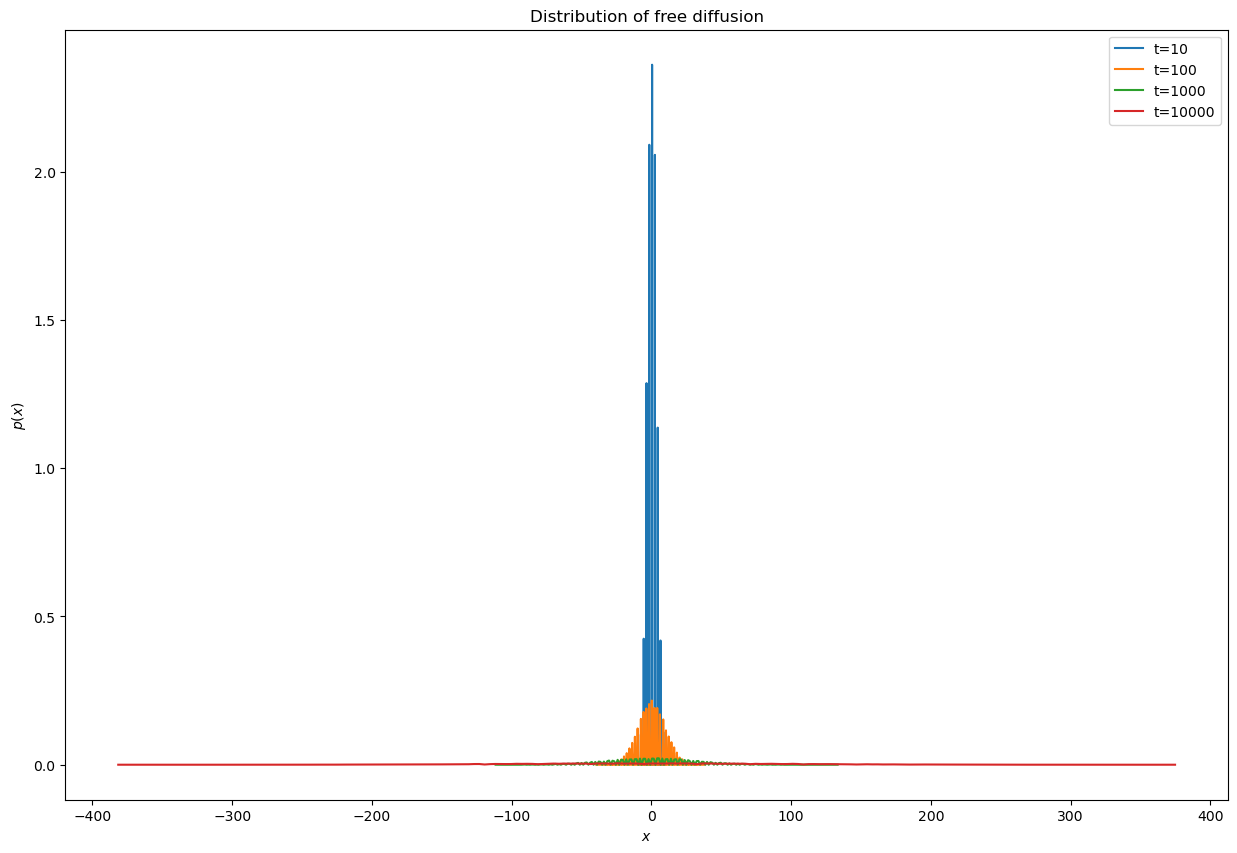

In [1]:
import numpy as np
from matplotlib import pyplot as plt

t = 10000                    # Number of iterations 
N = 10000
x = np.zeros((t+1,N))          # Pre allocation of the positions
dt = 1

for i in range(t):
    x[i+1,:] = x[i,:] + np.random.choice([-1, 1], size=N)#np.random.randn(N)*np.sqrt(dt)
    
    
l = 200#np.arange(100)-50
h10 = np.histogram(x[10,:],l, density=True)
h100 = np.histogram(x[100,:],l, density=True)
h1000 = np.histogram(x[1000,:],l, density=True)
h10000 = np.histogram(x[10000,:],l, density=True)

plt.figure(figsize=(15,10))
plt.plot(h10[1][:-1]+1/2,h10[0])
plt.plot(h100[1][:-1]+1/2,h100[0])
plt.plot(h1000[1][:-1]+1/2,h1000[0])
plt.plot(h10000[1][:-1]+1/2,h10000[0])
plt.legend(['t=10','t=100','t=1000','t=10000'])
plt.ylabel('$p(x)$')
plt.xlabel('$x$')
plt.title('Distribution of free diffusion')
plt.rcParams.update({'font.size': 18})